In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('marketing_data.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
data.shape

(2240, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
percent_missing_value=(data.isna().sum(axis=0)/data.shape[0])*100

In [8]:
percent_missing_value

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64

In [9]:
def drop_col(data,threshold):
    missing_percent=(data.isna().sum()/len(data))*100
    col_to_drop=missing_percent[missing_percent>threshold].index
    data.drop(columns=col_to_drop,inplace=True)
    return data
threshold=80

In [10]:
data=drop_col(data,threshold)

In [11]:
data.shape

(2240, 28)

In [12]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)[:10]

 Income              1.071429
ID                   0.000000
NumDealsPurchases    0.000000
Complain             0.000000
Response             0.000000
AcceptedCmp2         0.000000
AcceptedCmp1         0.000000
AcceptedCmp5         0.000000
AcceptedCmp4         0.000000
AcceptedCmp3         0.000000
dtype: float64

In [13]:
data=data.dropna(axis=0,how='any')

In [14]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [15]:
data.shape

(2216, 28)

In [16]:
import warnings
warnings.filterwarnings('ignore')
data['Children']=data['Kidhome']+data['Teenhome']

In [17]:
data['Spend']=(data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds'])

In [18]:
data['year']=2023
data['age']=data['year']-data['Year_Birth']

In [19]:
data=data.drop(['year'],axis=1)

<Axes: >

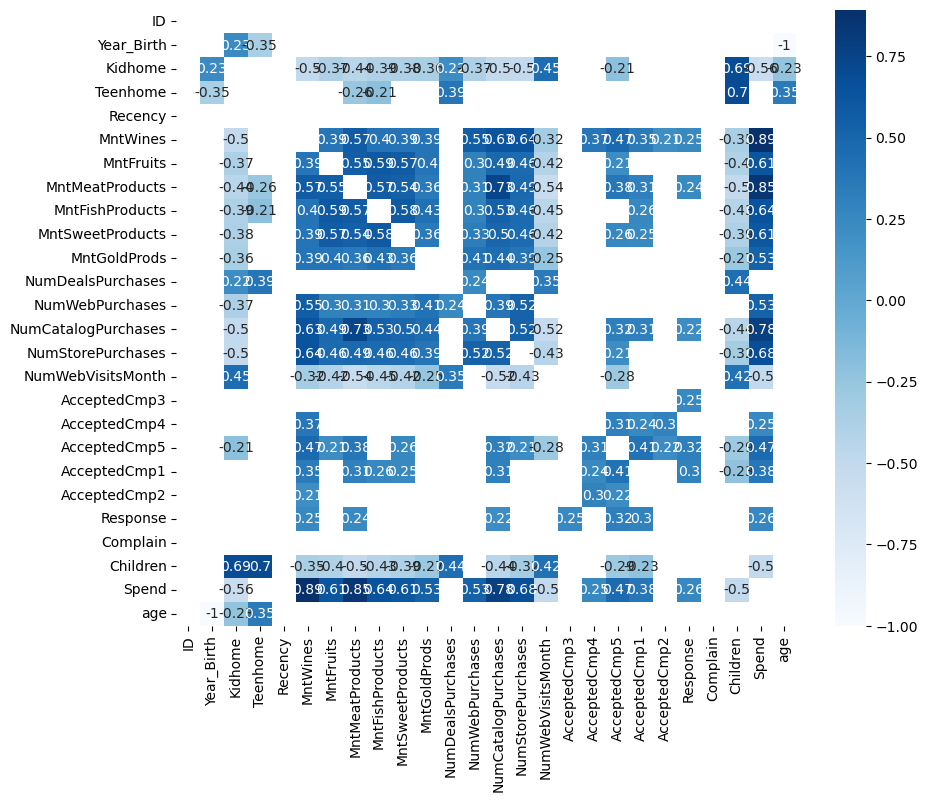

In [20]:
corr=data.corr()
thresh=0.2
kot=corr[((corr>=thresh)|(corr<=-thresh))&(corr!=1)]
plt.figure(figsize=(10,8))
sns.heatmap(kot,cmap='Blues',annot=True)

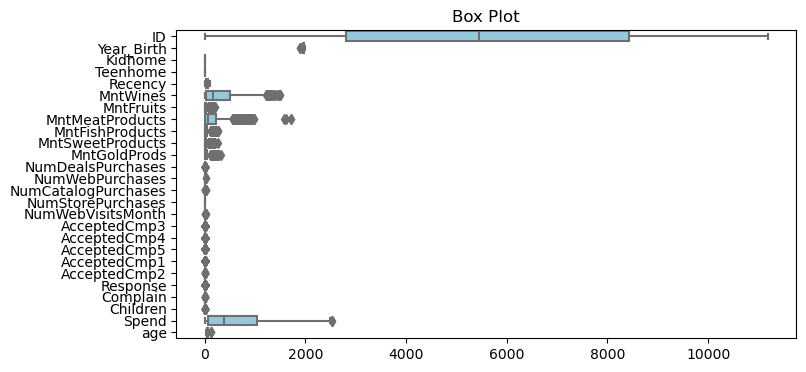

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, orient='h', color='skyblue')
plt.title('Box Plot')
plt.show()

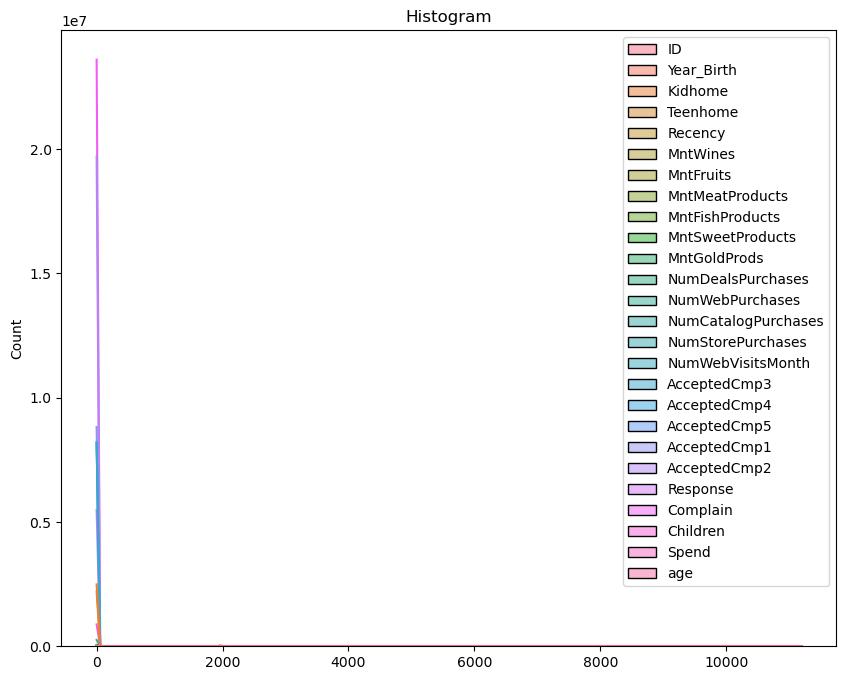

In [45]:
plt.figure(figsize=(10,8))
sns.histplot(data, kde=True, color='lightcoral', bins=20)
plt.title('Histogram')
plt.show()

In [23]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Spend,age
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,0,1190,53
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,0,577,62
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,1,251,65
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,0,0,0,0,0,AUS,2,11,56
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,0,0,0,0,1,0,SP,1,91,34


<Axes: xlabel='Age', ylabel='Accepted_campaign'>

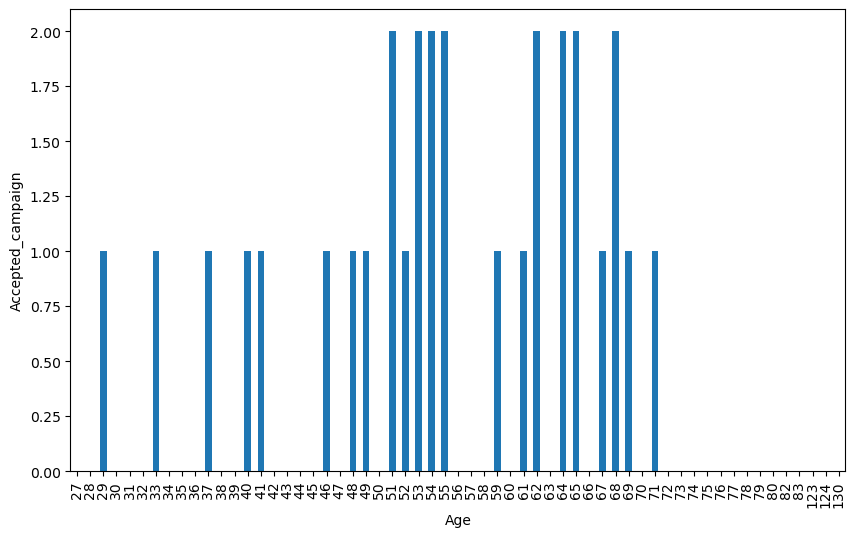

In [24]:
data.groupby('age')['AcceptedCmp2'].sum().plot(kind='bar',figsize=(10,6),ylabel='Accepted_campaign',xlabel='Age')

In [25]:
data['Children'].unique()

array([0, 1, 2, 3], dtype=int64)

<Axes: xlabel='Children', ylabel='Spend'>

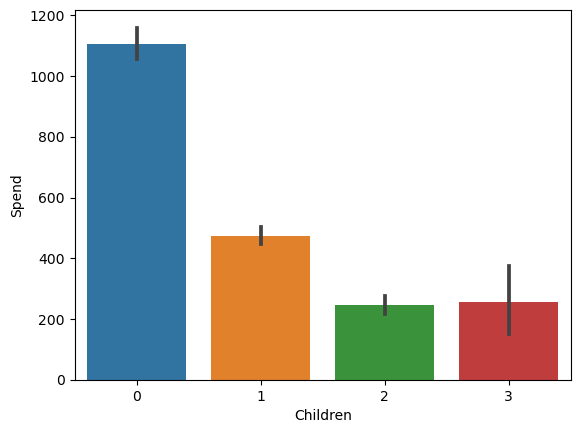

In [26]:
sns.barplot(x='Children',y='Spend',data=data)

In [27]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Spend,age
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,0,0,0,0,0,0,US,1,689,47
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,0,0,0,0,0,0,SP,1,55,46
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,0,0,0,0,0,0,SP,1,309,47
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,0,0,0,0,0,0,IND,0,1383,45
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,1,1,0,0,1,0,CA,2,1078,54


In [30]:
data['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='Complain'>

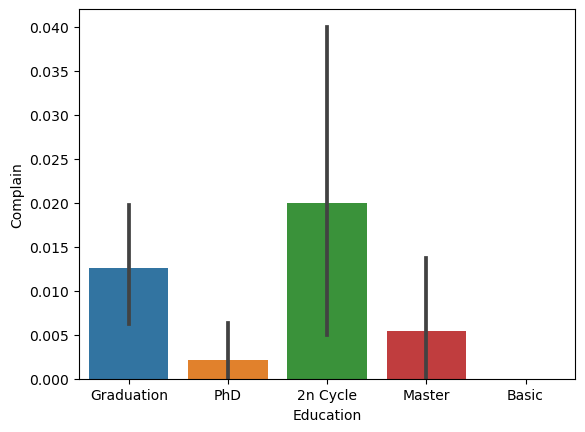

In [31]:
sns.barplot(x='Education',y='Complain',data=data)

In [32]:
data['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [38]:
data.groupby('Country')['AcceptedCmp2'].sum().idxmax()

'SP'

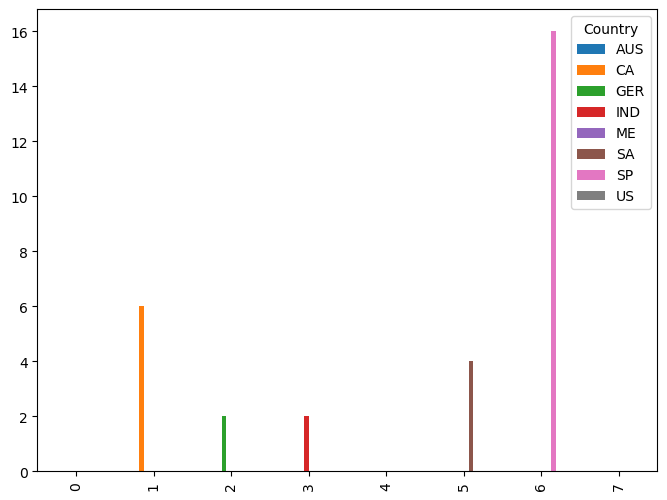

In [41]:
grouped_data = data.groupby('Country')['AcceptedCmp2'].sum().reset_index()
pivot_df = grouped_data.pivot(columns='Country', values='AcceptedCmp2')
# Plotting
ax = pivot_df.plot(kind='bar', figsize=(8,6))
# Display the plot
plt.show()

<Axes: xlabel='Children', ylabel='NumWebPurchases'>

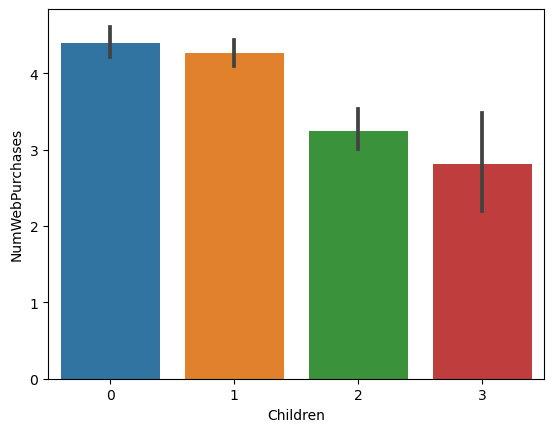

In [43]:
#customer with children opting for online shopping
sns.barplot(x='Children',y='NumWebPurchases',data=data)

<Axes: xlabel='Children', ylabel='NumStorePurchases'>

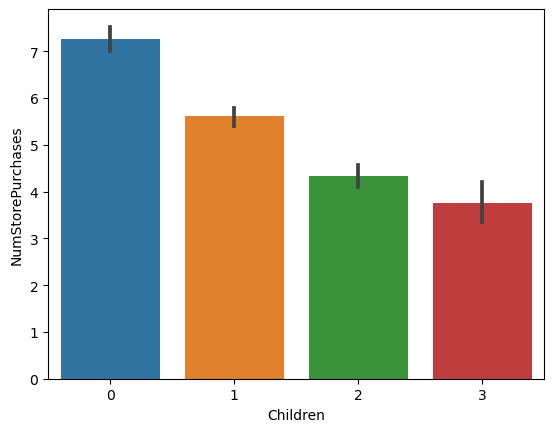

In [44]:
#customer with kids opting for offline shopping
sns.barplot(x='Children',y='NumStorePurchases',data=data)